# 1. Background Information

## Data Source : 

Basketball Reference: https://www.basketball-reference.com/

## Basketball intro: 

Basketball is a team sport in which two teams, most commonly of five players each, opposing one another on a rectangular court, compete with the primary objective of shooting a basketball (approximately 9.4 inches (24 cm) in diameter) through the defender's hoop (a basket 18 inches (46 cm) in diameter mounted 10 feet (3.048 m) high to a backboard at each end of the court) while preventing the opposing team from shooting through their own hoop. 

## Basketball positions/ functions:
- Point guard (PG) : usually the fastest player on the team, organizes the team's offense by controlling the ball and making sure that it gets to the right player at the right time.

- Shooting guard (SG) : creates a high volume of shots on offense, mainly long-ranged; and guards the opponent's best perimeter player on defense.

- Small forward (SF) : often primarily responsible for scoring points via cuts to the basket and dribble penetration; on defense seeks rebounds and steals, but sometimes plays more actively.

- Power forward (PF): plays offensively often with their back to the basket; on defense, plays under the basket (in a zone defense) or against the opposing power forward (in man-to-man defense).

- Center (C): uses height and size to score (on offense), to protect the basket closely (on defense), or to rebound.

The above descriptions are flexible. For most teams today, the shooting guard and small forward have very similar responsibilities and are often called the wings, as do the power forward and center, who are often called post players. While most teams describe two players as guards, two as forwards, and one as a center, on some occasions teams choose to call them by different designations.



## Data Introduction: 
There are **19647** observations and **48** variables in this data.

This data is the data of NBA players on regular seasons.

Each observation (row) includes the statistics per game of a player during one particular NBA regular season.


## Variables Description:

- Pos -- Position
- G -- Games
- GS -- Games Started
- MP_PER_GAME -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FGPERCENT -- Field Goal Percentage
- X3P -- 3-Point Field Goals Per Game
- X3PA -- 3-Point Field Goal Attempts Per Game
- X3PPERCENT -- 3-Point Field Goal Percentage
- X2P -- 2-Point Field Goals Per Game
- X2PA -- 2-Point Field Goal Attempts Per Game
- X2PPERCENT -- 2-Point Field Goal Percentage
- EFGPERCENT -- Effective Field Goal Percentage. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FTPERCENT -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PS_G -- Points Per Game

- MP_TOTAL -- Minutes Played
- PER -- Player Efficiency Rating. A measure of per-minute production standardized such that the league average is 15.
- TSPERCENT -- True Shooting Percentage. A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
- X3PAR -- 3-Point Attempt Rate. Percentage of FG Attempts from 3-Point Range
- FTR -- Free Throw Attempt Rate. Number of FT Attempts Per FG Attempt
- ORBPERCENT -- Offensive Rebound Percentage. An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
- DRBPERCENT -- Defensive Rebound Percentage. An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
- TRBPERCENT -- Total Rebound Percentage. An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
- ASTPERCENT -- Assist Percentage. An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
- STLPERCENT -- Steal Percentage. An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
- BLKPERCENT -- Block Percentage. An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
- TOVPERCENT -- Turnover Percentage. An estimate of turnovers committed per 100 plays.
- USGPERCENT -- Usage Percentage. An estimate of the percentage of team plays used by a player while he was on the floor.
- OWS -- Offensive Win Shares. An estimate of the number of wins contributed by a player due to his offense.
- DWS -- Defensive Win Shares. An estimate of the number of wins contributed by a player due to his defense.
- WS -- Win Shares. An estimate of the number of wins contributed by a player.
- WS_48 -- Win Shares Per 48 Minutes. An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
- OBPM -- Offensive Box Plus/Minus. A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- DBPM -- Defensive Box Plus/Minus. A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- BPM -- Box Plus/Minus. A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
- VORP -- Value over Replacement Player. A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.
- I -- year


## Data Collection: 
This data is recorded by NBA officials during each game

## Common Knowledge of NBA
1) NBA is short for National Basketball Association

2) NBA is composed of 30 teams (29 in the United States and 1 in Canada)

3) There are 82 games for each team during each regular season

## Project Questions:  
## What statistical attributes are special for each basketball position, in the past ten years? 

# 2. Exploratory Data Analysis

## Read in data/ Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
nba = pd.read_csv("regular_season_players.csv")

## 2.1 Data Cleaning and Filtering

#### Remove index column

In [2]:
nba = nba.drop(['Unnamed: 0','rk'], axis=1)

#### Add intercept column (For data modelling)

In [3]:
nba.insert(48,"intercept",1)

#### Filtering year

In [4]:
data = nba.loc[nba.i>=2009]

#### Filtering playing times

In [5]:
data = data.loc[nba.mp_per_game>=19.1,:]

We want to only analyze the players who have significant playing times. We use 19.1 as the cutoff point, which is the median of minutes per game.

#### Filtering positions (filter out swing position)

In [6]:
data = data.loc[nba.pos.isin(['SG','PG','PF','SF','C']),:]

#### Separate Data into three big clusters

In [7]:
guards = data.loc[nba.pos.isin(['SG','PG']),:]
forwards = data.loc[nba.pos.isin(['PF','SF']),:]
center = data.loc[nba.pos=='C',:]

## 2.2 General Exploration of entire dataset

### Selecting variables of interest
The original variables are clustered for different categories. 

For example, variables "fg", "fga",and "fgpercent" are all related to field goals. Variables "x3", "x3a", and "x3ppercent" are all related to 3 pointers. 

The variables within each category are very correlated, because of the similarity in the way these variables are calculated. Thus, for the purpose of simplicity and efficiency, **we select one variable from each category and conduct BETWEEN VARIABLE analysis on these variables**.

1) fg (field goals)
2) x3p (three points)
3) ft (freethrows)
4) orb (offensive rebounds) 
5) drb (defensive rebounds)
6) ast (assist)
7) stl (steal) 
8) blk (block)
9) tov (turnover)
10) ps_g (points per game)

#### Correlation Analysis Of variables of interest

In [8]:
import copy
nba_ge = copy.deepcopy(data)

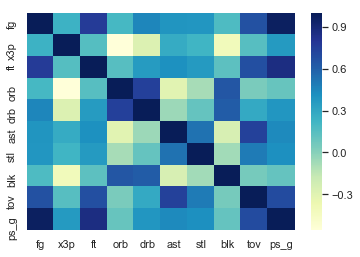

In [9]:
columns = ['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'] 
corr = nba_ge[columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

From the correlation map, we find some significant correlations:
- **fg (field goals)** are positively correlated with : ft (freethrows), tov(turnover), ps_g(points per game)
- **x3p (three points)** is negatively correlated with orb (offensive rebounds)
- **ft (freethrows)** is positively connected with  tov(turnover), ps_g(points per game)
- **orb (offensive rebounds)** is positively connected with drb (defensive rebounds)
- **ast (assist)** is positively connected with tov (turnover) and stl (steal)
- **blk (block)** is positively correlated to orb (offensive rebounds) and drb (defensive rebounds)
- **tov (turnover)** is positively correlated with fg (field goals), ft (free throws), ps_g (points per game)
- **ps_g** (points per game) is positively correlated with fg (field goals), ft (freethrows), tov(turnover)

### Summary Statisics for each of the variable

In [10]:
nba_ge[['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'] ].describe()


,fg,x3p,ft,orb,drb,ast,stl,blk,tov,ps_g
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,4.490609,0.944879,2.142702,1.160497,3.612862,2.677203,0.881184,0.526335,1.620619,12.066689
std,1.777918,0.759503,1.437269,0.907420,1.718897,1.959668,0.398051,0.508365,0.739964,4.983434
min,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.200000,0.200000,1.100000,0.500000,2.300000,1.300000,0.600000,0.200000,1.100000,8.400000
50%,4.200000,0.900000,1.800000,0.800000,3.200000,2.100000,0.800000,0.400000,1.500000,11.200000
75%,5.500000,1.500000,2.800000,1.700000,4.500000,3.500000,1.100000,0.700000,2.000000,14.850000
max,10.800000,5.100000,9.200000,6.000000,12.000000,12.800000,2.800000,6.000000,5.700000,32.000000


## 2.3 Explorations between Guards, Forwards, and Center
What statistical attributes can you use to separate guards from forwards and center?

#### Separate all observations into three big groups, based on the positions

In [11]:
nba_ge.loc[nba_ge.pos=='SG', 'pos'] = 'Guards'
nba_ge.loc[nba_ge.pos=='PG', 'pos'] = 'Guards'
nba_ge.loc[nba_ge.pos=='SF', 'pos'] = 'Forwards'
nba_ge.loc[nba_ge.pos=='PF', 'pos'] = 'Forwards'
nba_ge.loc[nba_ge.pos=='C', 'pos'] = 'Center'

In [12]:
interested = nba_ge[['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pos'] ]

### 2.3.1 Snapshot of the distributions of each variables 

effects of individual variables and relationship between variables

/Users/maenjie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


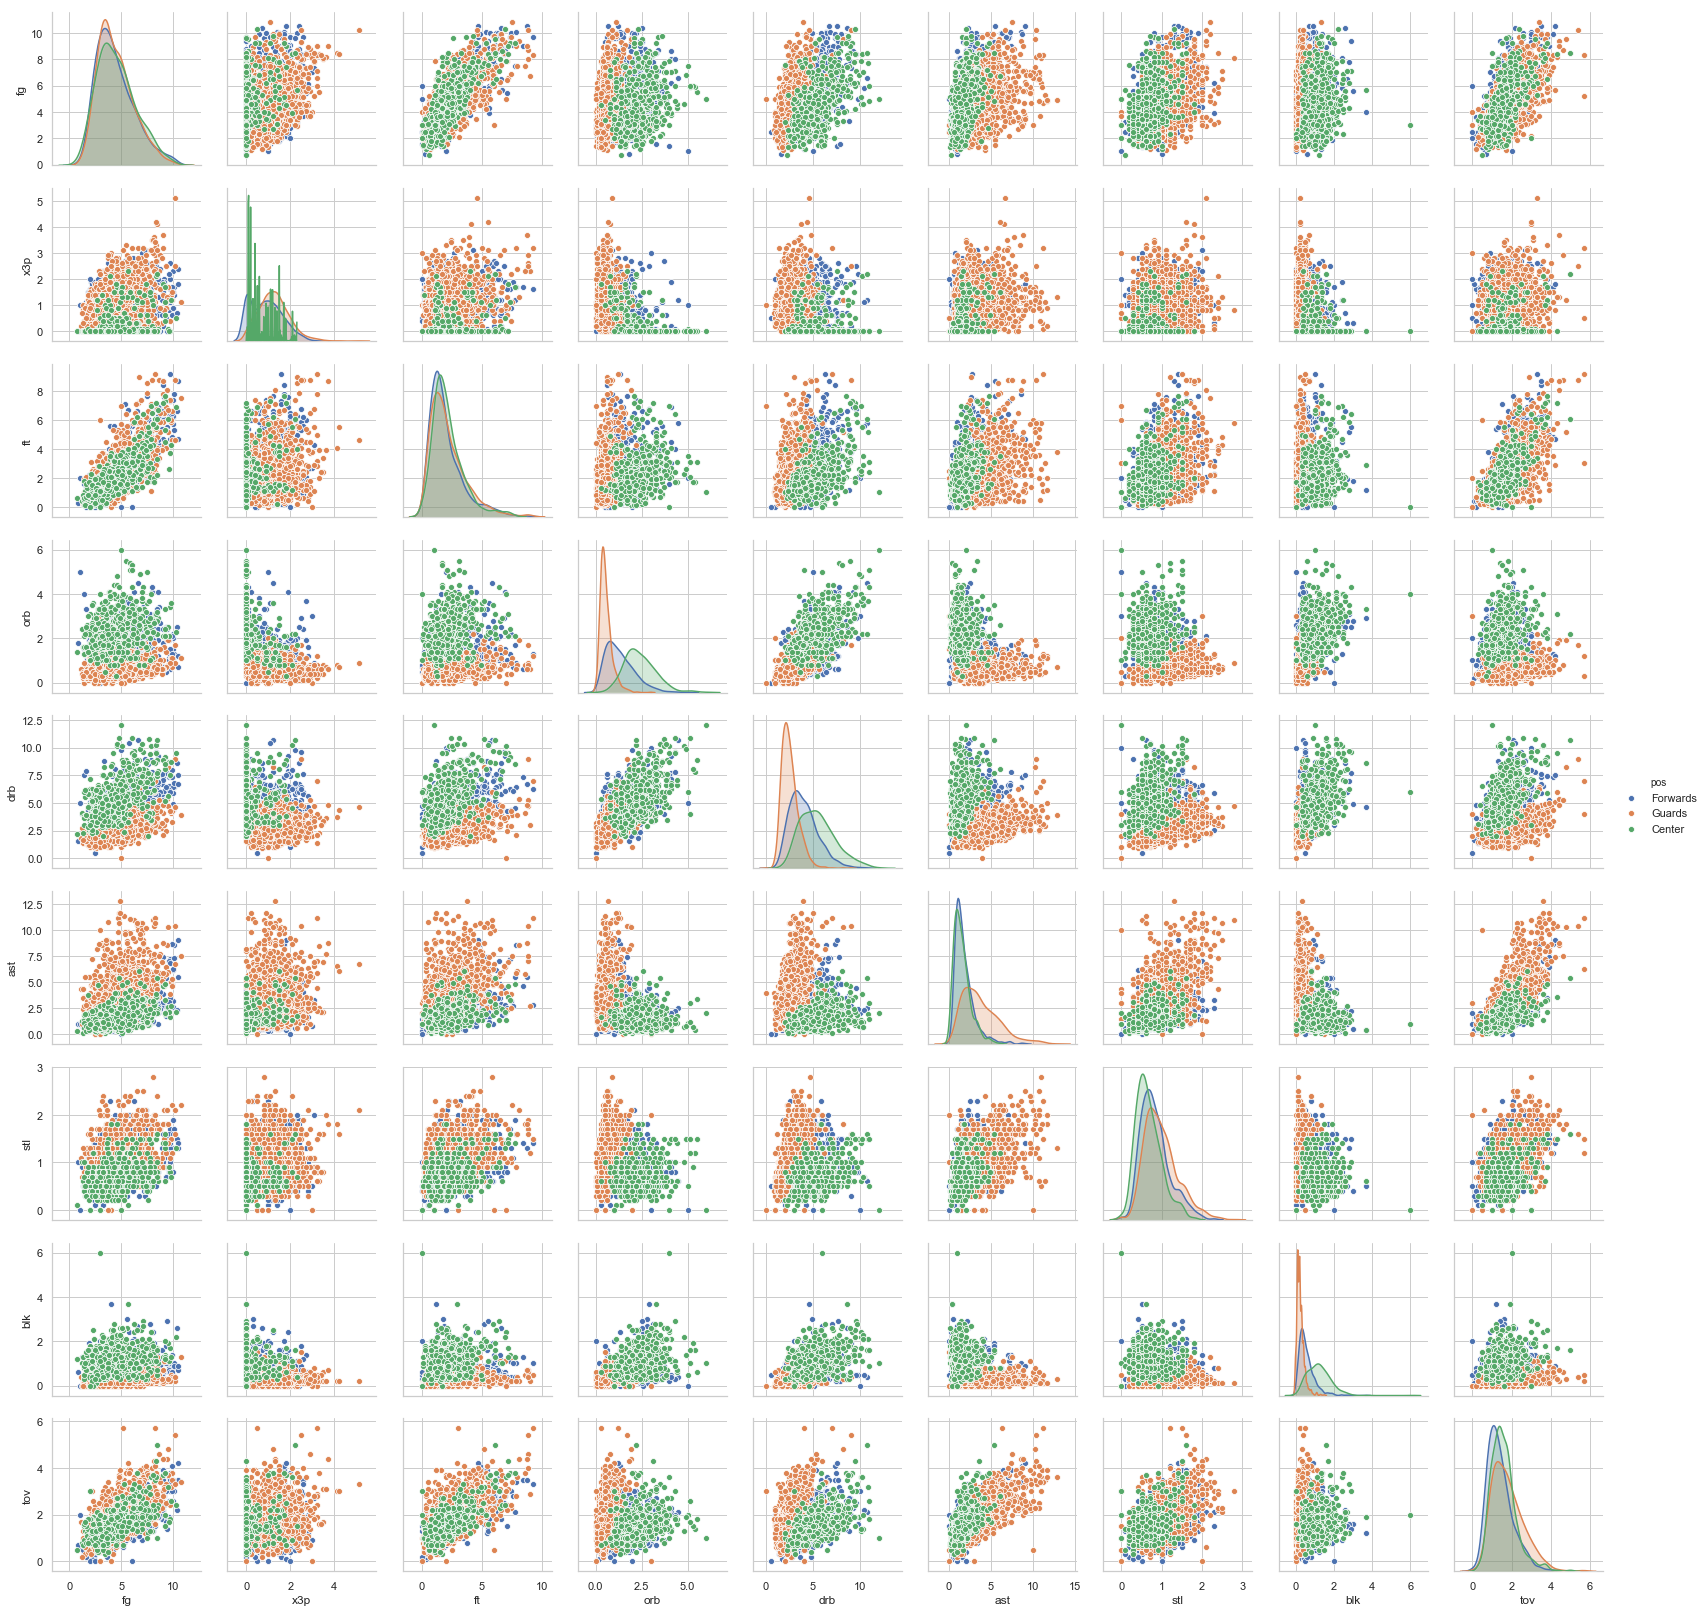

In [13]:
import seaborn as sns
sns.pairplot(interested, diag_kind = 'kde', hue = "pos")
plt.show()

From the graph above, we can see that for most of the variables, different positions have different distributions. Our variables can be potential great classifier for identifying positions amont three big groups. 

### 2.3.2  Analysis of variables for each position group

#### 1) guards

#### Between Variable analysis, with selected variables

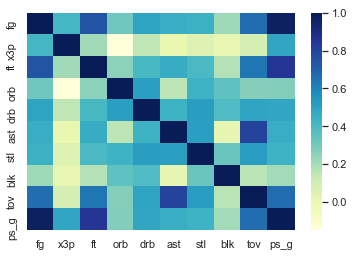

In [14]:
columns = ['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'] 
corr = guards[columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

We find some high correlations between these variables within the Guards:  
- fg and ft (Field Goals Per Game and Free Throws Per Game)
- fg and tov (Field Goals Per Game and Turnovers Per Game)
- fg and ps_g (Field Goals Per Game and Points Per Game)
- ft and tov (Free Throws Per Game and Turnovers Per Game)
- ft and ps_g (Free Throws Per Game and Points Per Game)
- ast and tov (Assists Per Game and Turnovers Per Game)
- tov and ps_g (Turnovers Per Game and Points Per Game)

#### 2) forwards

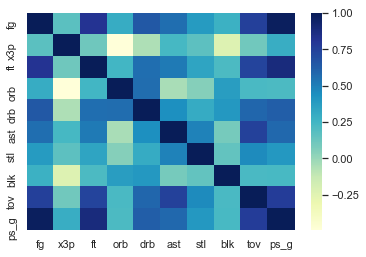

In [15]:
columns = ['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'] 
corr = forwards[columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

We find some high correlations between these variables within the Forwards:  
- fg and ft (Field Goals Per Game and Free Throws Per Game)
- **New** fg and drb (Field Goals Per Game and Defensive Rebounds Per Game)
- fg and tov (Field Goals Per Game and Turnovers Per Game)
- fg and ps_g (Field Goals Per Game and Points Per Game)
- ft and tov (Free Throws Per Game and Turnovers Per Game)
- ft and ps_g (Free Throws Per Game and Points Per Game)
- ast and tov (Assists Per Game and Turnovers Per Game)
- tov and ps_g (Turnovers Per Game and Points Per Game)

#### 3) center

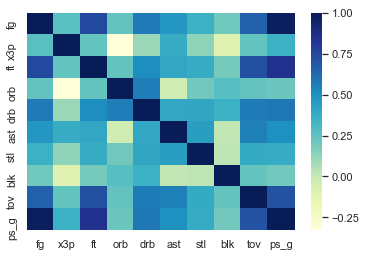

In [16]:
columns = ['fg', 'x3p', 'ft', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'] 
corr = center[columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

We find some high correlations between these variables within the Center:  
- fg and ft (Field Goals Per Game and Free Throws Per Game)
- fg and tov (Field Goals Per Game and Turnovers Per Game)
- fg and ps_g (Field Goals Per Game and Points Per Game)
- ft and tov (Free Throws Per Game and Turnovers Per Game)
- ft and ps_g (Free Throws Per Game and Points Per Game)
- **No** ast and tov (Assists Per Game and Turnovers Per Game)
- tov and ps_g (Turnovers Per Game and Points Per Game)

### Summary Statistics tables

#### Individual variables analysis (variables that are different for each position)

#### 1) medians

In [17]:
nba_ge.groupby('pos')['fg', 'fga','fgpercent','x3p','x3pa','x3ppercent', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'].median()

,fg,fga,fgpercent,x3p,x3pa,x3ppercent,orb,drb,ast,stl,blk,tov,ps_g
pos,,,,,,,,,,,,,
Center,4.3,8.3,0.5145,0.0,0.0,0.1025,2.3,5.3,1.4,0.6,1.2,1.5,10.8
Forwards,4.1,9.1,0.4520,0.9,2.6,0.3440,1.2,3.8,1.5,0.8,0.5,1.3,10.9
Guards,4.2,9.9,0.4300,1.2,3.4,0.3570,0.5,2.4,3.3,0.9,0.2,1.7,11.6


- Similiar medians for all three groups: fg and tov
- fga: center < forwards < guards
- fgpercent: guards < forwards < center
- x3p & x3pa & x3ppercent: center < forwards < guards
- orb & drb: guards < forwards < center
- ast: center < forwards < guards
- stl: center < forwards < guards
- blk: guards < forwards < center
- tov: forwards < center < guards
- ps_g: center < forwards < guards

#### 2) means

In [18]:
nba_ge.groupby('pos')['fg', 'fga','fgpercent','x3p','x3pa','x3ppercent', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'].mean()

,fg,fga,fgpercent,x3p,x3pa,x3ppercent,orb,drb,ast,stl,blk,tov,ps_g
pos,,,,,,,,,,,,,
Center,4.575745,8.887021,0.521198,0.156809,0.463191,0.173972,2.417234,5.512553,1.589787,0.679149,1.217660,1.600638,11.507447
Forwards,4.466464,9.778019,0.455160,0.905213,2.537967,0.310143,1.329018,4.039705,1.854561,0.843701,0.566377,1.411642,11.887663
Guards,4.481335,10.389226,0.428529,1.260546,3.487785,0.346695,0.565175,2.562671,3.783384,0.985964,0.244841,1.810243,12.422458


- fg: forwards < guards < center
- tov: forwards < center < guards

Similarly,
- fga: center < forwards < guards
- fgpercent: guards < forwards < center
- x3p & x3pa & x3ppercent: center < forwards < guards
- orb & drb: guards < forwards < center
- ast: center < forwards < guards
- stl: center < forwards < guards
- blk: guards < forwards < center
- tov: forwards < center < guards
- ps_g: center < forwards < guards

#### 3) standard deviations

In [19]:
nba_ge.groupby('pos')['fg', 'fga','fgpercent','x3p','x3pa','x3ppercent', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'ps_g'].std()

,fg,fga,fgpercent,x3p,x3pa,x3ppercent,orb,drb,ast,stl,blk,tov,ps_g
pos,,,,,,,,,,,,,
Center,1.844350,3.765105,0.061211,0.412681,1.114484,0.209256,0.859998,1.853192,0.995910,0.315065,0.614334,0.646146,4.890094
Forwards,1.834753,3.745840,0.050160,0.704698,1.838121,0.119310,0.773479,1.518825,1.191774,0.366335,0.417288,0.644633,5.069253
Guards,1.702243,3.633568,0.040532,0.685443,1.662461,0.075442,0.328582,0.896125,2.176147,0.417308,0.197016,0.797277,4.917410


#### 2.3.3 Analysis of the effect position has on each variable.

### Distributional Shape of  each variables

#### 1) fg (field goals)

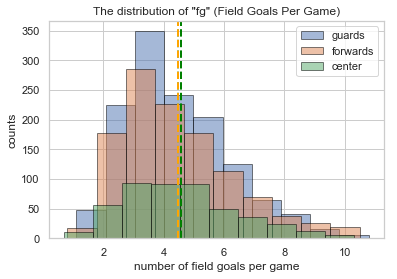

In [20]:
plt.hist(guards['fg'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['fg'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['fg'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['fg'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['fg'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['fg'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of field goals per game')
plt.ylabel('counts')
plt.title('The distribution of "fg" (Field Goals Per Game)')
plt.legend(loc='upper right')
plt.show()

- There are no much differences among the three groups.
- Center has flatter distribution (3/4/5 are similar).

#### 2) fga (field goals attempts)

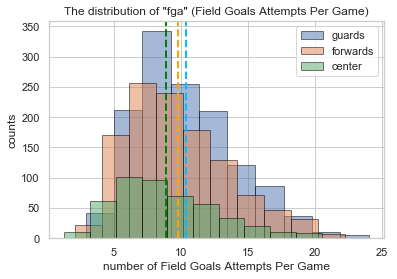

In [21]:
plt.hist(guards['fga'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['fga'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['fga'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['fga'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['fga'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['fga'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Field Goals Attempts Per Game')
plt.ylabel('counts')
plt.title('The distribution of "fga" (Field Goals Attempts Per Game)')
plt.legend(loc='upper right')
plt.show()

- right-skewness: center > forwards > guards
- mean: center < forwards < guards

#### 3) fgpercent (field goal percentage)

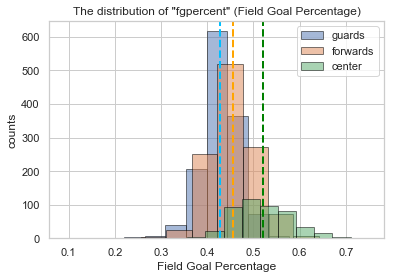

In [22]:
plt.hist(guards['fgpercent'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['fgpercent'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['fgpercent'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['fgpercent'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['fgpercent'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['fgpercent'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Field Goal Percentage')
plt.ylabel('counts')
plt.title('The distribution of "fgpercent" (Field Goal Percentage)')
plt.legend(loc='upper right')
plt.show()

- They all culster around 0.4-0.5 when calculating in percentage.
- Center is more left-skewed than the other two.

#### 4) x3p (3-point field goals)

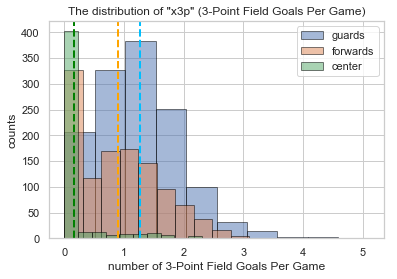

In [23]:
plt.hist(guards['x3p'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['x3p'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['x3p'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['x3p'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['x3p'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['x3p'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of 3-Point Field Goals Per Game')
plt.ylabel('counts')
plt.title('The distribution of "x3p" (3-Point Field Goals Per Game)')
plt.legend(loc='upper right')
plt.show()

- Most of Center have 0 3-point field goals per game.
- Guards generally have more 3-point field goals than Forwards and Center.

#### 5) x3pa (3-point field goal attempts)

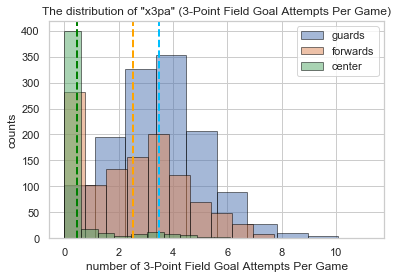

In [24]:
plt.hist(guards['x3pa'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['x3pa'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['x3pa'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['x3pa'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['x3pa'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['x3pa'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of 3-Point Field Goal Attempts Per Game')
plt.ylabel('counts')
plt.title('The distribution of "x3pa" (3-Point Field Goal Attempts Per Game)')
plt.legend(loc='upper right')
plt.show()

- Same as 'x3p'.

#### 6) 3-point field goal percentage

/Users/maenjie/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/maenjie/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


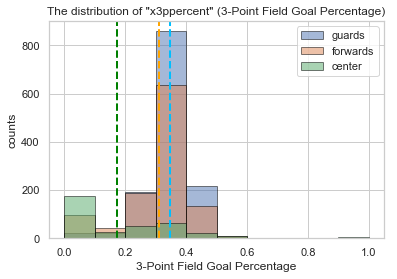

In [25]:
plt.hist(guards['x3ppercent'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['x3ppercent'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['x3ppercent'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['x3ppercent'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['x3ppercent'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['x3ppercent'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('3-Point Field Goal Percentage')
plt.ylabel('counts')
plt.title('The distribution of "x3ppercent" (3-Point Field Goal Percentage)')
plt.legend(loc='upper right')
plt.show()

- Most of the data is around 0.3-0.4.

#### 7) free throws

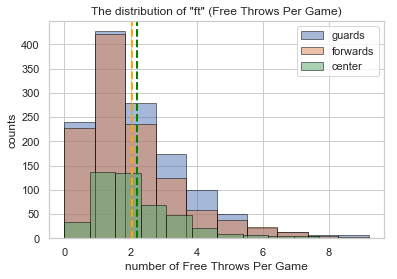

In [26]:
plt.hist(guards['ft'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['ft'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['ft'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['ft'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['ft'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['ft'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Free Throws Per Game')
plt.ylabel('counts')
plt.title('The distribution of "ft" (Free Throws Per Game)')
plt.legend(loc='upper right')
plt.show()

- Guards and Forwards have very similar distribution and mean.
- Guards and Forwards have a lot of 1 free throw per game.

#### 8) offensive rebounds

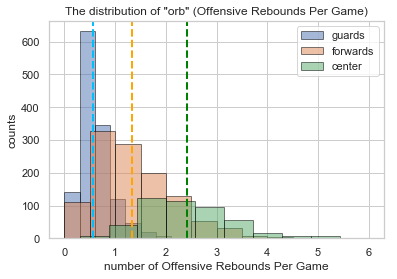

In [27]:
plt.hist(guards['orb'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['orb'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['orb'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['orb'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['orb'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['orb'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Offensive Rebounds Per Game')
plt.ylabel('counts')
plt.title('The distribution of "orb" (Offensive Rebounds Per Game)')
plt.legend(loc='upper right')
plt.show()

- Center leads offensive rebounds.
- Guards do the least offensive rebounds.
- Guards and Forwards have right-skewed distributions.

#### 9) defensive rebounds

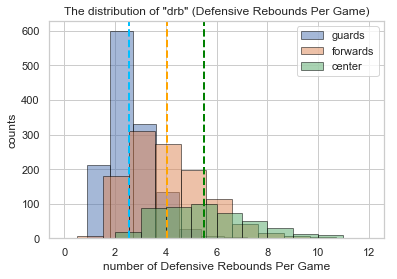

In [28]:
plt.hist(guards['drb'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['drb'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['drb'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['drb'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['drb'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['drb'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Defensive Rebounds Per Game')
plt.ylabel('counts')
plt.title('The distribution of "drb" (Defensive Rebounds Per Game)')
plt.legend(loc='upper right')
plt.show()

- Center leads offensive rebounds.
- Guards do the least offensive rebounds.
- All three groups have more defensive rebounds than offensive rebounds.

#### 10) assists

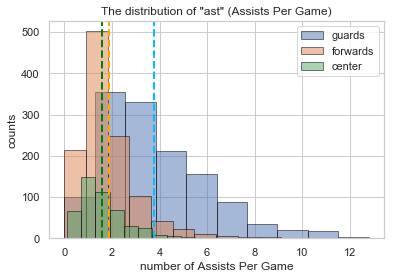

In [29]:
plt.hist(guards['ast'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['ast'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['ast'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['ast'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['ast'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['ast'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Assists Per Game')
plt.ylabel('counts')
plt.title('The distribution of "ast" (Assists Per Game)')
plt.legend(loc='upper right')
plt.show()

- Guards have more assits than the other two groups.
- Forwards usually have 1 assist per game.
- They are all right-skewed.

#### 11) steals

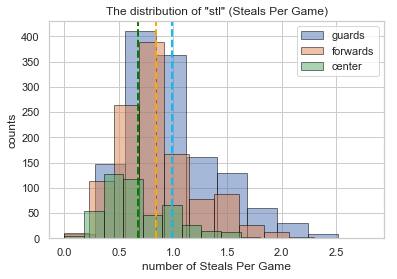

In [30]:
plt.hist(guards['stl'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['stl'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['stl'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['stl'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['stl'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['stl'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Steals Per Game')
plt.ylabel('counts')
plt.title('The distribution of "stl" (Steals Per Game)')
plt.legend(loc='upper right')
plt.show()

- Guards usually steal more than Forwards and Forwards more than Center.

#### 12) blocks

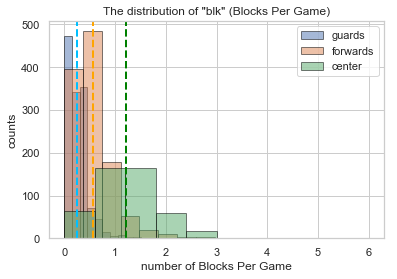

In [31]:
plt.hist(guards['blk'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['blk'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['blk'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['blk'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['blk'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['blk'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Blocks Per Game')
plt.ylabel('counts')
plt.title('The distribution of "blk" (Blocks Per Game)')
plt.legend(loc='upper right')
plt.show()

- Center has more blocks than the other two groups.
- Guards and Forwards have very right-skewed distributions.

#### 13) turnovers

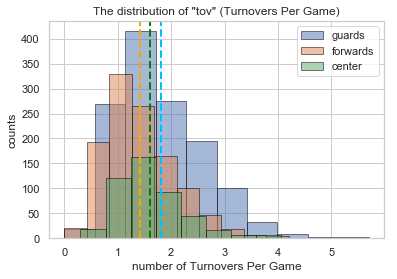

In [32]:
plt.hist(guards['tov'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['tov'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['tov'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['tov'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['tov'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['tov'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Turnovers Per Game')
plt.ylabel('counts')
plt.title('The distribution of "tov" (Turnovers Per Game)')
plt.legend(loc='upper right')
plt.show()

- They all have similar distributions and means.
- Guards have more turnovers than Forwards than Center, on average.

#### 14) points

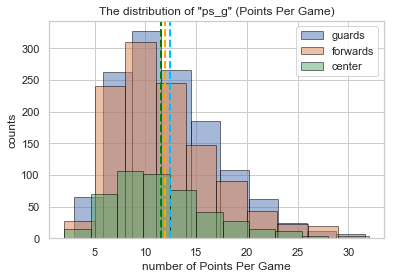

In [33]:
plt.hist(guards['ps_g'], edgecolor='black', alpha = 0.5, label = 'guards')
plt.axvline(guards['ps_g'].mean(), color='deepskyblue', linestyle='dashed', linewidth=2)
plt.hist(forwards['ps_g'], edgecolor='black', alpha = 0.5, label = 'forwards')
plt.axvline(forwards['ps_g'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.hist(center['ps_g'], edgecolor='black', alpha = 0.5, label = 'center')
plt.axvline(center['ps_g'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('number of Points Per Game')
plt.ylabel('counts')
plt.title('The distribution of "ps_g" (Points Per Game)')
plt.legend(loc='upper right')
plt.show()

- Guards and Forwards have very similar distributions and means. Guards on average get slightly more points than Forwards.

### 2.3.4 Summary of Distinctive feature of Guards 

### From the exploration we've done between the groups of center, forwards, and guards, we have summarized some distinct characteristics of the guard positions in the past ten years.

Individual variables:
-	Guards attempt more **field goals (fta)**
-	Guards have lower **field goals percentage (fgpercent)**
-	Guards have more **3-point field goals (x3p)**
-	Guards attempt **more 3 points (x3pa)**
-	Guards have higher **3 point percentage**
-	Guards grab lower **offensive rebounds (orb)** and **defensive rebounds (drb)**
-	Guards have more **assists (ast)**
-	Guards have more **steal (stl)**
-	Guards have lower **blocks (blk)**
-	Guards have more **turnover (tov)**
-	Guards have more **points per game (ps_g)**

Between variables:
- The strong correlation between **assist** and **turonver** is strong for the guards. Which means that point guards nowadays tend to make risky passes, which may lead to turnover. 


## 2.4 Deeper exploration within the guards position

## Motivation: 
In the past ten years, the playing style of guards have changed drastically. The point guards now are not playing in the traditional point guards' way anymore, which was pass first and creating opportunities for the teammates.  Starting point guards in this league, such as James Harden, Russell Westbrook, and Stephen Curry are all explosive scorers and play like shooting gurads. 

## Then how exactly do point guards play differently from shooting guards? 



#### Further divide guards into point guards and shooting gurads

In [34]:
SGs = guards.loc[guards.pos=='SG']
PGs = guards.loc[guards.pos=='PG']

#### Analysis of each variables for each position

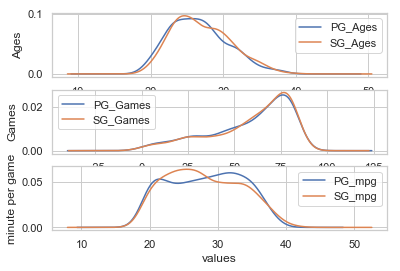

In [35]:
plt.subplot(3,1,1)
PGs.age.plot.kde(label = "PG_Ages")
SGs.age.plot.kde(label = "SG_Ages")
plt.ylabel('Ages')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.g.plot.kde(label = "PG_Games")
SGs.g.plot.kde(label = "SG_Games")
plt.ylabel('Games')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.mp_per_game.plot.kde(label = "PG_mpg")
SGs.mp_per_game.plot.kde(label = "SG_mpg")
plt.ylabel('minute per game')
plt.xlabel('values')
plt.legend()

plt.show()

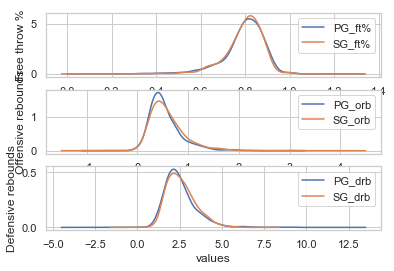

In [36]:
plt.subplot(3,1,1)
PGs.ftpercent.plot.kde(label = "PG_ft%")
SGs.ftpercent.plot.kde(label = "SG_ft%")
plt.ylabel('Free throw %')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.orb.plot.kde(label = "PG_orb")
SGs.orb.plot.kde(label = "SG_orb")
plt.ylabel('Offensive rebounds')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.drb.plot.kde(label = "PG_drb")
SGs.drb.plot.kde(label = "SG_drb")
plt.ylabel('Defensive rebounds')
plt.xlabel('values')
plt.legend()

plt.show()

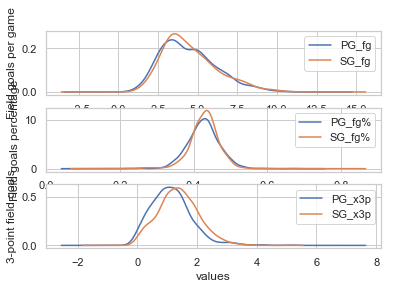

In [37]:
plt.subplot(3,1,1)
PGs.fg.plot.kde(label = "PG_fg")
SGs.fg.plot.kde(label = "SG_fg")
plt.ylabel('Field goals per game')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.fgpercent.plot.kde(label = "PG_fg%")
SGs.fgpercent.plot.kde(label = "SG_fg%")
plt.ylabel('Field goals percentage')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.x3p.plot.kde(label = "PG_x3p")
SGs.x3p.plot.kde(label = "SG_x3p")
plt.ylabel('3-point field goals')
plt.xlabel('values')
plt.legend()

plt.show()

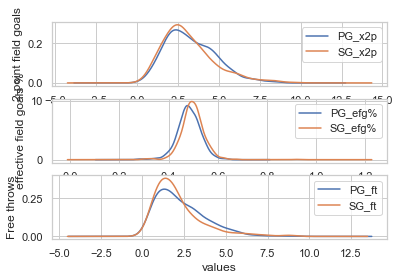

In [38]:
plt.subplot(3,1,1)
PGs.x2p.plot.kde(label = "PG_x2p")
SGs.x2p.plot.kde(label = "SG_x2p")
plt.ylabel('2-point field goals')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.efgpercent.plot.kde(label = "PG_efg%")
SGs.efgpercent.plot.kde(label = "SG_efg%")
plt.ylabel('effective field goals %')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.ft.plot.kde(label = "PG_ft")
SGs.ft.plot.kde(label = "SG_ft")
plt.ylabel('Free throws')
plt.xlabel('values')
plt.legend()

plt.show()

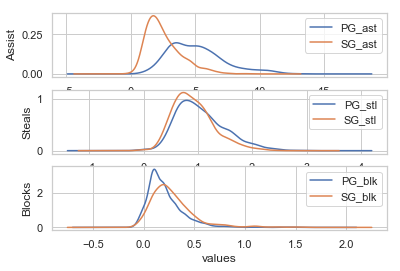

In [39]:
plt.subplot(3,1,1)
PGs.ast.plot.kde(label = "PG_ast")
SGs.ast.plot.kde(label = "SG_ast")
plt.ylabel('Assist')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.stl.plot.kde(label = "PG_stl")
SGs.stl.plot.kde(label = "SG_stl")
plt.ylabel('Steals')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.blk.plot.kde(label = "PG_blk")
SGs.blk.plot.kde(label = "SG_blk")
plt.ylabel('Blocks')
plt.xlabel('values')
plt.legend()

plt.show()

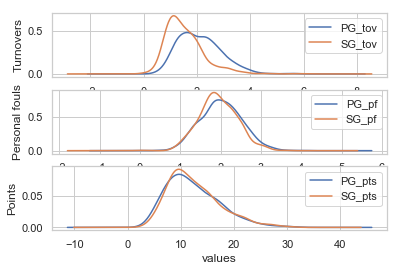

In [40]:
plt.subplot(3,1,1)
PGs.tov.plot.kde(label = "PG_tov")
SGs.tov.plot.kde(label = "SG_tov")
plt.ylabel('Turnovers')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.pf.plot.kde(label = "PG_pf")
SGs.pf.plot.kde(label = "SG_pf")
plt.ylabel('Personal fouls')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.ps_g.plot.kde(label = "PG_pts")
SGs.ps_g.plot.kde(label = "SG_pts")
plt.ylabel('Points')
plt.xlabel('values')
plt.legend()

plt.show()

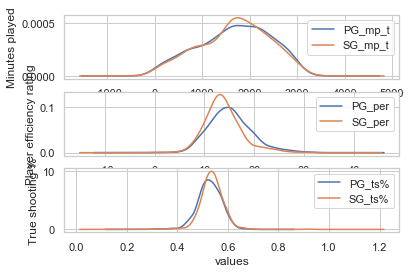

In [41]:
plt.subplot(3,1,1)
PGs.mp_total.plot.kde(label = "PG_mp_t")
SGs.mp_total.plot.kde(label = "SG_mp_t")
plt.ylabel('Minutes played')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.per.plot.kde(label = "PG_per")
SGs.per.plot.kde(label = "SG_per")
plt.ylabel('Player efficiency rating')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.tspercent.plot.kde(label = "PG_ts%")
SGs.tspercent.plot.kde(label = "SG_ts%")
plt.ylabel('True shooting %')
plt.xlabel('values')
plt.legend()

plt.show()

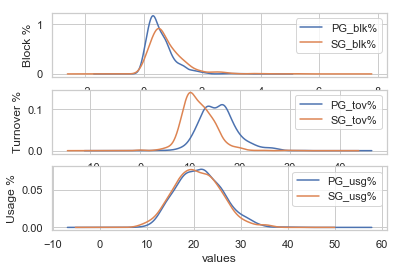

In [42]:
plt.subplot(3,1,1)
PGs.blkpercent.plot.kde(label = "PG_blk%")
SGs.blkpercent.plot.kde(label = "SG_blk%")
plt.ylabel('Block %')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.tovpercent.plot.kde(label = "PG_tov%")
SGs.tovpercent.plot.kde(label = "SG_tov%")
plt.ylabel('Turnover %')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.usgpercent.plot.kde(label = "PG_usg%")
SGs.usgpercent.plot.kde(label = "SG_usg%")
plt.ylabel('Usage %')
plt.xlabel('values')
plt.legend()

plt.show()

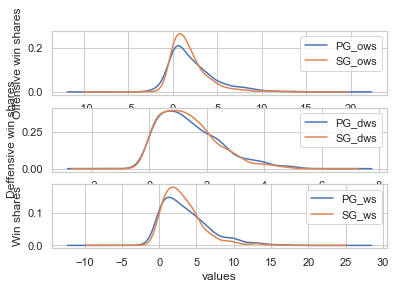

In [43]:
plt.subplot(3,1,1)
PGs.ows.plot.kde(label = "PG_ows")
SGs.ows.plot.kde(label = "SG_ows")
plt.ylabel('Offensive win shares')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.dws.plot.kde(label = "PG_dws")
SGs.dws.plot.kde(label = "SG_dws")
plt.ylabel('Deffensive win shares')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.ws.plot.kde(label = "PG_ws")
SGs.ws.plot.kde(label = "SG_ws")
plt.ylabel('Win shares')
plt.xlabel('values')
plt.legend()

plt.show()

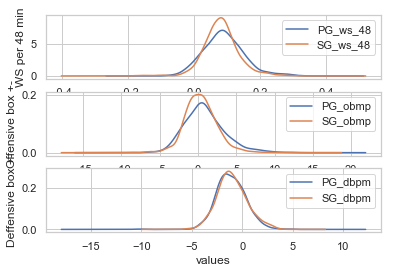

In [44]:
plt.subplot(3,1,1)
PGs.ws_48.plot.kde(label = "PG_ws_48")
SGs.ws_48.plot.kde(label = "SG_ws_48")
plt.ylabel('WS per 48 min')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,2)
PGs.obpm.plot.kde(label = "PG_obmp")
SGs.obpm.plot.kde(label = "SG_obmp")
plt.ylabel('Offensive box +-')
plt.xlabel('values')
plt.legend()

plt.subplot(3,1,3)
PGs.dbpm.plot.kde(label = "PG_dbpm")
SGs.dbpm.plot.kde(label = "SG_dbpm")
plt.ylabel('Deffensive box +-')
plt.xlabel('values')
plt.legend()

plt.show()

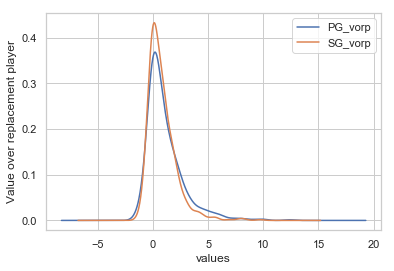

In [45]:
PGs.vorp.plot.kde(label = "PG_vorp")
SGs.vorp.plot.kde(label = "SG_vorp")
plt.ylabel('Value over replacement player')
plt.xlabel('values')
plt.legend()
plt.show()

#### Findings from the density plots:

After exploring entire features related to player's positions, we found **7 attributes that separate point guards from shooting guards**: turnovers, turnover percentage, blocks, blocks percentage, minutes per game, assists and player efficiency rating.
        
- **Turnovers (tov)**: Number of turnovers for point guards is generally higher than that of shooting guards

- **Turnover Percentage (tovpercent)** : Percentage of turnovers for point guards is generally higher than that of shooting guards

- **Blocks (blk)**: Number of blocks per game for shooting guards is generally higher than that of point guards

- **Blocks percentage (blk)**: Percentage of blocks per game for shooting guards is generally higher than that of point guards

- **Player efficiency rating (PER)**: PER for point guards is slightly higher than that of shooting guards

- **Minutes per game**: Minutes per game for point guards is generally higher than that of shooting guards

- **Assists (ast)**: Number of assists for point guards is much higher than that of shooting guards



### Statistical comparison for significant variables of each guard position

1) mean comparison

In [46]:
guards.groupby("pos")['tovpercent','tov','blk','blkpercent','per','mp_per_game','ast'].mean()

,tovpercent,tov,blk,blkpercent,per,mp_per_game,ast
pos,,,,,,,
PG,15.688906,2.105625,0.207031,0.573125,15.196563,28.180469,5.089375
SG,11.655015,1.531416,0.280531,0.793068,13.772566,27.926991,2.550590


2) median comparison 

In [47]:
guards.groupby("pos")['tovpercent','tov','blk','blkpercent','per','mp_per_game','ast'].median()

,tovpercent,tov,blk,blkpercent,per,mp_per_game,ast
pos,,,,,,,
PG,15.5,2.0,0.2,0.5,14.9,28.5,4.8
SG,11.3,1.4,0.2,0.6,13.4,27.4,2.2


### Outliers Detection and Analysis

In [48]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    for y in data_1.index:
        z_score = (data_1[y] - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

Using this function, we can find the index of outliers for each varibles.

However, as going back to the data and identifying those outliers, we found those outliers representive: those players are **all stars players**. 

For example, if we find the outliers for free throw variable and turnover variable together, Russell Westbrook and James Harden are the two outliers. Yet they are the most valuable guards nowadays. 

Although deleting those outliers can be beneficial for finding the general patterns for the attributes which are significant in deciding the positions of players, it will have negative influence on the accuracy rate.

In addition, the outliers, data of all star guards, can contain valuable information regarding the difference between point guards and shooting guards. Hence we decide to keep those important information instead of deleting them.

In [49]:
print(detect_outlier(guards.ast))
print(detect_outlier(guards.tov))

[14046, 14194, 14618, 14641, 14777, 15215, 15284, 15392, 15792, 15836, 16418, 16993, 17665, 18265, 18363, 18598, 18938, 18946]
[16641, 17774, 18015, 18363, 18598, 18946, 19215, 19608]


In [50]:
guards.loc[[18363, 18598,18946], ]

,player,pos,age,tm,g,gs,mp_per_game,fg,fga,fgpercent,...,usgpercent,ows,dws,ws,ws_48,obpm,dbpm,vorp,i,intercept
18363,Russell Westbrook,PG,27,OKC,80,80.0,34.4,8.2,18.1,0.454,...,31.6,10.0,4.0,14.0,0.245,7.6,2.4,8.3,2016,1
18598,James Harden,PG,27,HOU,81,81.0,36.4,8.3,18.9,0.440,...,34.2,11.5,3.6,15.0,0.245,8.7,1.5,9.0,2017,1
18946,Russell Westbrook,PG,28,OKC,81,81.0,34.6,10.2,24.0,0.425,...,41.7,8.5,4.6,13.1,0.224,10.9,4.7,12.4,2017,1


# 3. Data Modeling

### In order to better understand the differences between point guards and shooting guards, we decide to train different binary classfication models to see which models work and which attributes matter the most. We also want to check if the conclusions from model support our findings in the EDA.

### After training the model, we want to test the model on Russell Westbrook, who is one of the representatives of the point guards in this era, and see what the result will be.


### Import packages

In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 3.1 Model Exploration

### Transform Categorical Position variable into Binary Outcome

In [52]:
guards.loc[guards.pos=='PG', 'pos']=1
guards.loc[guards.pos=='SG', 'pos']=0

/Users/maenjie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Subsetting Russell Westbrook's Data for Prediction
#### We chose Russell Westbrook for single case study because he is one of the representative point guards in today's league.  

In [53]:
Russell=guards[guards.player=="Russell Westbrook"]
Russell_X=Russell.drop(['pos', 'player', 'tm', 'i'], axis=1)
Russell_y=Russell.pos

### Subsetting the rest of the data for modelling

In [54]:
others=guards[guards.player!="Russell Westbrook"]
others=others.dropna()
X=others.drop(['pos', 'player', 'tm', 'i'], axis=1)
y=others.pos

## 1) Logistic Regression

### Logistic Regression Model Fitting 

In [55]:
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.261651
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.622      
Dependent Variable: pos              AIC:              772.3855   
Date:               2019-06-03 14:41 BIC:              1005.1791  
No. Observations:   1304             Log-Likelihood:   -341.19    
Df Model:           44               LL-Null:          -902.98    
Df Residuals:       1259             LLR p-value:      1.1694e-206
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------
age             -0.1443   0.0293 -4.9221 0.0000   -0.2018  -0.0868
g                0.0043   0.0312  0.1389 0.8895   -0.

#### significant variables (alpha=0.10): 
age, gs,
fga,x2pa,x2ppercent,mp_per_game,orb,tov,pf,orbpercent,drbpercent,astpercent, stlpercent

### Keeping only significant variables. Train model again

In [56]:
X_2 = X[["age", "gs","fga","x2pa","x2ppercent", "mp_per_game","orb","tov","pf","orbpercent","drbpercent","astpercent", "stlpercent","intercept"]]

In [57]:
logit_model2=sm.Logit(y, X_2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.287878
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.584      
Dependent Variable: pos              AIC:              778.7863   
Date:               2019-06-03 14:41 BIC:              851.2110   
No. Observations:   1304             Log-Likelihood:   -375.39    
Df Model:           13               LL-Null:          -902.98    
Df Residuals:       1290             LLR p-value:      2.4534e-217
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
age            -0.1262    0.0251  -5.0258  0.0000  -0.1754  -0.0770
gs              0.0181    0.0051   3.5489  0.0004

### Model Accuracy (Cross Validation)

In [58]:
sklogit = LogisticRegression()
result_sk = sklogit.fit(X_2, y)
cv = model_selection.ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cv_logit = model_selection.cross_val_score(sklogit, X_2, y, cv = cv)
print(np.mean(cv_logit))

0.8723926380368099


/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

## 2) KNN

KNN is another typical methodology that we can use to classify the position for Russell. It is also a non-parametric method. First, we cleaned the data as we did for the logistic regression model and we tested for each k (the number of training observation) in 1 to 10. It does not vary too much and the mean accuracy rate is 0.70. We have the best performance when k=1 (rate=0.74).

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [60]:
X_2_train,X_2_test,y_train,y_test=train_test_split(X_2,y,test_size=0.25,random_state=0)

### K parameter selection

In [61]:
accuracy=[]
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_2_train, y_train)
    accuracy.append(knn.score(X_2_test, y_test))
print(sum(accuracy)/10)
print(accuracy)

0.8368098159509204
[0.8282208588957055, 0.8220858895705522, 0.8374233128834356, 0.8343558282208589, 0.843558282208589, 0.8466257668711656, 0.8374233128834356, 0.8404907975460123, 0.8343558282208589, 0.843558282208589]


Then we cross validated the KNN method for k=1, and the accuracy is stable, which shows our model is valid.

### Model Accuracy (Cross Validation)

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)
cv = model_selection.ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cv_knn = model_selection.cross_val_score(knn, X_2, y, cv = cv)
print(cv_knn)
print(np.mean(cv_knn))

[0.82822086 0.83128834 0.83742331 0.82515337 0.84969325]
0.8343558282208589


### Application of model on Russell Westbrook

We put our model on the data of Russell and got an expected result. The accuracy rate is about 8 or 9 out of 10. Compared to logistic regression model, one of the shortcoming of the KNN method is that we are unable to know which factors are significant to decide his position. Interestingly, as we can see in the previous chunk, the best performance is when K=1, which is abnormal, because it shows that to decide one's position, there is no general pattern for being a PG or SG. Each players style varies a lot.

In [63]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    print(knn.predict(Russell_X))

[1 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 0 1]
[0 1 1 1 1 1 1 1 0 1]


## 3) Random Forest

Since the outcome variable (pos) is binary and predictor variables are numerical, we think Random Forest is a good choice for our dataset. Random forest is known for having relatively low variance and low bias. First, as we did in KNN method, we tried Random Forest algorithm on the training data set with all the variables in the dataset and got an accuracy of 0.85

In [64]:
accuracy=[]
for i in range(10):
    clf=RandomForestClassifier(n_estimators=250)
    clf.fit(X_train,y_train)
    accuracy.append(clf.score(X_test, y_test))
print(sum(accuracy)/10)

0.8552147239263803


Then, we made the feature importance ranking plot. From that, we choose the most important 10 features without collinearity between each other (such as: pick "astpercent" instead both "astpercent" and "ast") and generated the model on selected features. The accuracy is still 0.85

No handles with labels found to put in legend.


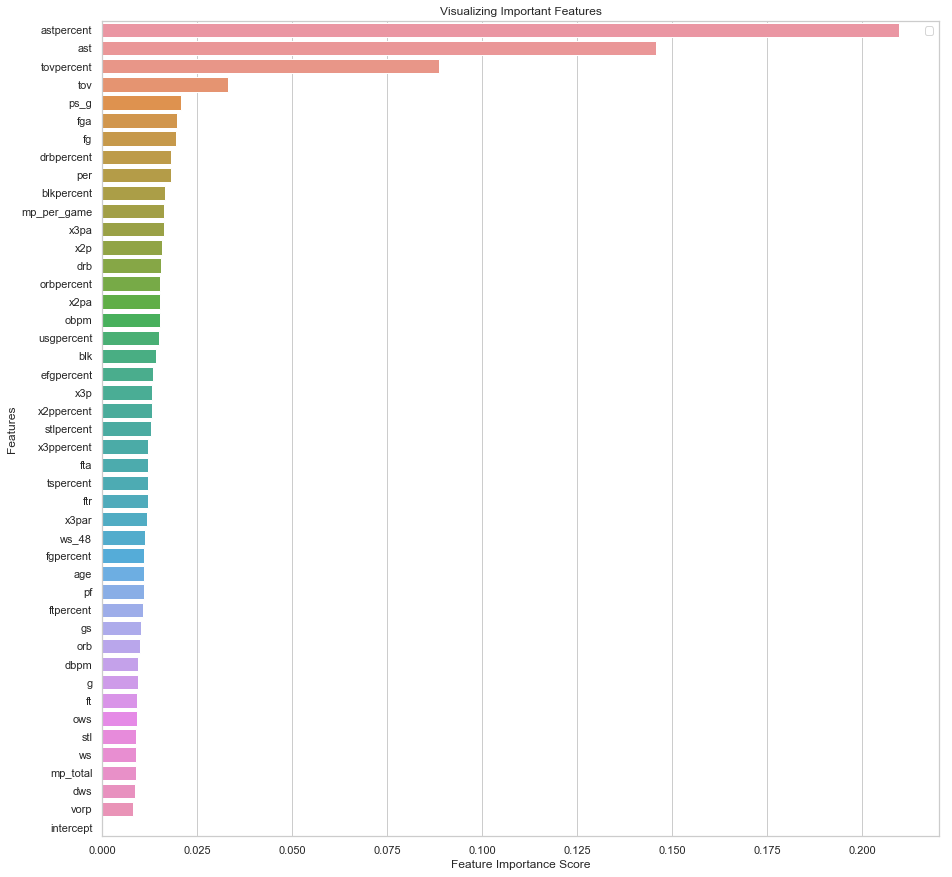

In [65]:
feature_imp = pd.Series(clf.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
feature_imp
plt.figure(figsize=(15, 15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [66]:
X_2=X[['astpercent', 'tovpercent', 'fga', 'ps_g', 'x2pa', 'per', 'blkpercent', 'x3pa', 'drbpercent', 'obpm']]
X_2_train,X_2_test,y_train,y_test=train_test_split(X_2,y,test_size=0.25,random_state=0)
accuracy=[]
for i in range(10):
    clf=RandomForestClassifier(n_estimators=250)
    clf.fit(X_2_train,y_train)
    accuracy.append(clf.score(X_2_test, y_test))
print(sum(accuracy)/10)

0.8512269938650308


Using this modified model on "Russell", and the accuracy rate of the Random Forest model is decent. For predicting Russell’s position, usually 6 or 7 out of 10 times are correct (depends on different seed). For potential improvement, we can incorporate hyperparameter tuning after we selected features. For the purpose of our project, we explored parameters like the number of trees in the forest (n_estimators). However, due to time limit, we have not had a chance to explore other parameters. 

### Model Accuracy (Cross Validation)

In [67]:
Russell_X_2=Russell_X[['astpercent', 'tovpercent', 'fga', 'ps_g', 'x2pa', 'per', 'blkpercent', 'x3pa', 'drbpercent', 'obpm']]
clf=RandomForestClassifier(n_estimators=250)
clf.fit(X_2, y)### Model Accuracy (Cross Validation)
print(clf.score(Russell_X_2, Russell_y))

0.6


## 3.1 model exploration resutls: 
### - knn
    - Poor Interpretabilty
    - Moderate CV Accuracy (83%)
    - Time Consuming Computation
### -  random forest
    - Poor CV Accuracy (70%)
    - Hard to quantify the effect each variable has on the outcome
### - logistics
    - Best CV Accuracy (87%)
    - Good Interpretability 
        - Quantifiable variable significance: P-value
        - Quantifiable variable effects: coefficients


## Final Model choice :
based on the comparison above, we decide to use **Logistic Regression** As our final model. 


## 3.2 Check the validity of the final model  

#### Sufficient Sample Size

In [68]:
print(X_2.shape)

(1304, 10)


There are 1304 observations in our data, which is sufficient

#### Check collinearity.

In [69]:
X_2 = X[["age", "gs","fga","x2pa","x2ppercent", "mp_per_game","orb","tov","pf","drbpercent","astpercent", "stlpercent","intercept"]]
vif2 = pd.DataFrame()
vif2["VIF_Factor"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif2["features"] = X_2.columns
vif2.head(11)

,VIF_Factor,features
0,1.102045,age
1,2.179727,gs
2,7.242014,fga
3,5.999694,x2pa
4,1.099990,x2ppercent
5,4.701489,mp_per_game
6,1.715616,orb
7,4.569421,tov
8,1.375230,pf
9,1.246267,drbpercent


No Multicollinearity detected. All variables have VIF that are less than 10

#### ROC curve

/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


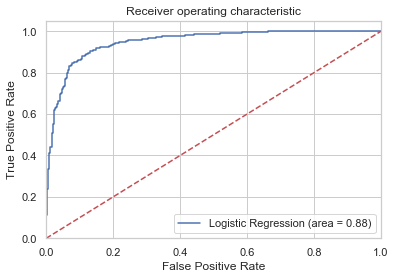

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression()
logreg.fit(X_2, y)

logit_roc_auc = roc_auc_score(y, logreg.predict(X_2))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X_2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier. 

A good classifier stays as far away from that line as possible (toward the top-left corner).

From the ROC curve above, we can see that this logistic model actually performs very well.

#### Our Logistic Model satisfies all of the model assumption:
- The data, used for training model, have sufficient sample size (1304)
- There is no multicollinearity between the predictors.
- Our selection of logistic regression is reseaonable. The logistic model is well suited for our data

## 3.3 Final Model Interpretation

### Model summary output

In [71]:
print(result2.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.584      
Dependent Variable: pos              AIC:              778.7863   
Date:               2019-06-03 14:41 BIC:              851.2110   
No. Observations:   1304             Log-Likelihood:   -375.39    
Df Model:           13               LL-Null:          -902.98    
Df Residuals:       1290             LLR p-value:      2.4534e-217
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
age            -0.1262    0.0251  -5.0258  0.0000  -0.1754  -0.0770
gs              0.0181    0.0051   3.5489  0.0004   0.0081   0.0281
fga            -0.2942    0.0714  -4.1232  0.0000  -0.4341  -0.1544
x2pa           

### Interpretation from the summary Output: 
If we want to separate Point guards from Shooting guards in the last 10 years, the following attributes are significant:

- **age (age)**: Point Guards tend to be younger.

- **gs (game started)**:Point Guards start more game than shooting Guards

- **fga (field goals attempted)** : Point Guards tend to attempt more field goals

- **x2pa (2-point attempted)**: Point Guards tend to attempt less 2 pointers. 

- **x2ppercent (2-point percentage)**: Point Guards tend to have lower 2 pointers percentage

- **orb(offensive rebounds)**: Point Guards tend to have more offensive rebounds 

- **tov (turnover)** : Point Guards tend to have less turnovers than Shooting Guards.

- **pf (personal fouls)** : Point Guards tend to have more personal fouls than Shooting Guards

- **orbpercent (offensive rebounds percentage)** : Point Guards tend to have less offensive rebound percentage than Shooting Guards

- **drbpercent (defensive rebounds percentage)** : Point Guards tend to have less defensive rebound percentage than Shooting Guards

- **astpercent (assist percentage)** : Point Guards tend to have more assists for their teams than Shooting Guards

- **stlpercent (steal percentage)** : Point Guards tend to have more steals for their teams than Shooting Guards.


## 3.4 Case Analysis - Prediction on Russell Westbrook's data

In [72]:
Russell_X_2=Russell_X[["age", "gs","fga","x2pa","x2ppercent", "mp_per_game","orb","tov","pf","drbpercent","astpercent", "stlpercent","intercept"]]
logreg = LogisticRegression()
logreg.fit(X_2, y)
np.where(logreg.predict(Russell_X_2)==1,"PG","SG")

/Users/maenjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['PG', 'PG', 'PG', 'SG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG'],
      dtype='<U2')

### Insert Prediction Results into Russell's data

In [73]:
Russell.insert(0,"prediction",np.where(logreg.predict(Russell_X_2)==1,"PG","SG"))

In [74]:
Russell.loc[:,"pos"] = np.where(Russell.pos==1,"PG","SG")

/Users/maenjie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [75]:
Russell[["player","prediction","pos","i"]]

,player,prediction,pos,i
14187,Russell Westbrook,PG,PG,2009
14772,Russell Westbrook,PG,PG,2010
15383,Russell Westbrook,PG,PG,2011
15939,Russell Westbrook,SG,PG,2012
16524,Russell Westbrook,PG,PG,2013
17135,Russell Westbrook,PG,PG,2014
17774,Russell Westbrook,PG,PG,2015
18363,Russell Westbrook,PG,PG,2016
18946,Russell Westbrook,PG,PG,2017
19608,Russell Westbrook,PG,PG,2018


### Findings from the case of Russell Westbrook:
The only time our classification model identify Russell as a shooting guards is the year of 2012, which happens to be the only time the Thunders have made into the final. 

It might be the case that, when Russell plays the game in the contemporary point guard style - which is to be a scorer instead of a passer - his personal achievement might be great but his team might be hurt from that.

# 4. Conclusion

## Significant attributes for separating Point Guards from Shooting Guards
- **EDA**

    1) Turnovers
    
    2) Turnover Perccentage
    
    3) Blocks
    
    4) Blocks Percentage
    
    5) Player Efficiency Rating
    
    6) Minutes per game
    
    7) Assist
    

- **Classification Model (Logistic Regression)**

    1) Age
    
    2) Game Started
    
    3) Field Goals Attempted 
    
    4) 2-point attempted 
    
    5) 2-point percentage
    
    6) Offensive rebound
    
    7) Turnover
    
    8) Personal Fouls
    
    9) Offensive rebounds percentage
    
    10) Defensive rebounds percentage
    
    11) Assist percentage
    
    12) Steal percentage
    
### The significant variables derived from the EDA and modelling, though different, can still reflect some distinctive features of Point Guards nowadays.

In this era, Point Guards

- Comprehensively control the **offense**, whether in terms of assist or of scoring
- Are Less active on the **defensive** side, in terms of steals, rebounds, and block
- Attacking from midrange or in the paint is not the primary focus. **3 pointers** might be the primary scoring weapon.